In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]]) #this is a matrices not array.
y_train = np.array([460, 232, 178])
X_features = ['size(sqft)','bedrooms','floors','age']

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

 View the dataset and its features by plotting each feature versus price

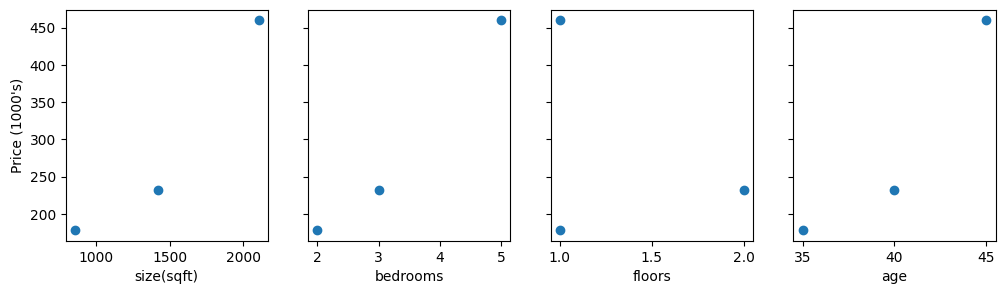

In [7]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey= True) #we initialize fig variable to deal with scatter and setlable func
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

z-score normalization:
𝑥(𝑖)𝑗=(𝑥(𝑖)𝑗−𝜇𝑗)/𝜎𝑗

𝜇𝑗=1𝑚∑𝑖=0𝑚−1𝑥(𝑖)𝑗

𝜎^2𝑗=1𝑚∑𝑖=0𝑚−1(𝑥(𝑖)𝑗−𝜇𝑗)2

In [9]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # we do not need to make a loop couse np function will do the job!
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [10]:
# normalize the features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.45733333e+03 3.33333333e+00 1.33333333e+00 4.00000000e+01], 
X_sigma = [5.11961804e+02 1.24721913e+00 4.71404521e-01 4.08248290e+00]
Peak to Peak range by column in Raw        X:[1252    3    1   10]
Peak to Peak range by column in Normalized X:[2.44549494 2.40535118 2.12132034 2.44948974]


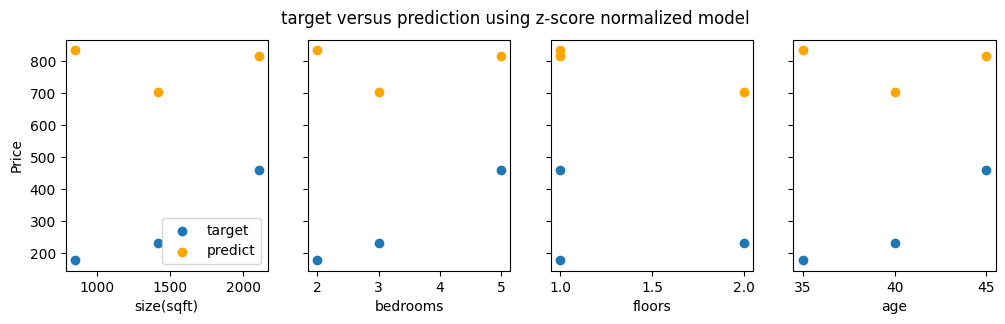

In [40]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m) # yp for y prediction
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_init) + b_init

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], yp, color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()
# prediction is not accurate couse w and b is not suitable

In [41]:
# First, normalize out example, Tryin for one row example of x_train,
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_init) + b_init
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.50264166 -0.26726124 -0.70710678  0.        ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $817704
